<a href="https://colab.research.google.com/github/vaishaliraut/DeepLearningDemo/blob/main/HandwrittenDigitClassificationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handwritten Digit Classification project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Load MNIST Data

In [2]:
from keras.datasets import mnist
(xtrain, ytrain) , (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

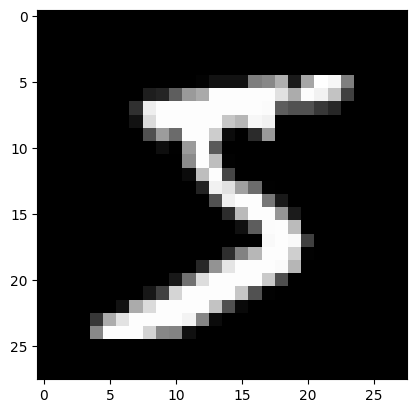

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

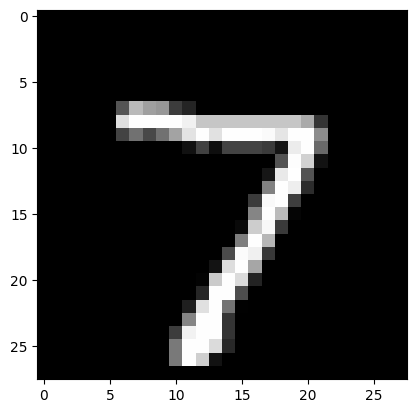

In [9]:
plt.imshow(xtest[0], cmap='gray')

### Displaying first 9 images of train data

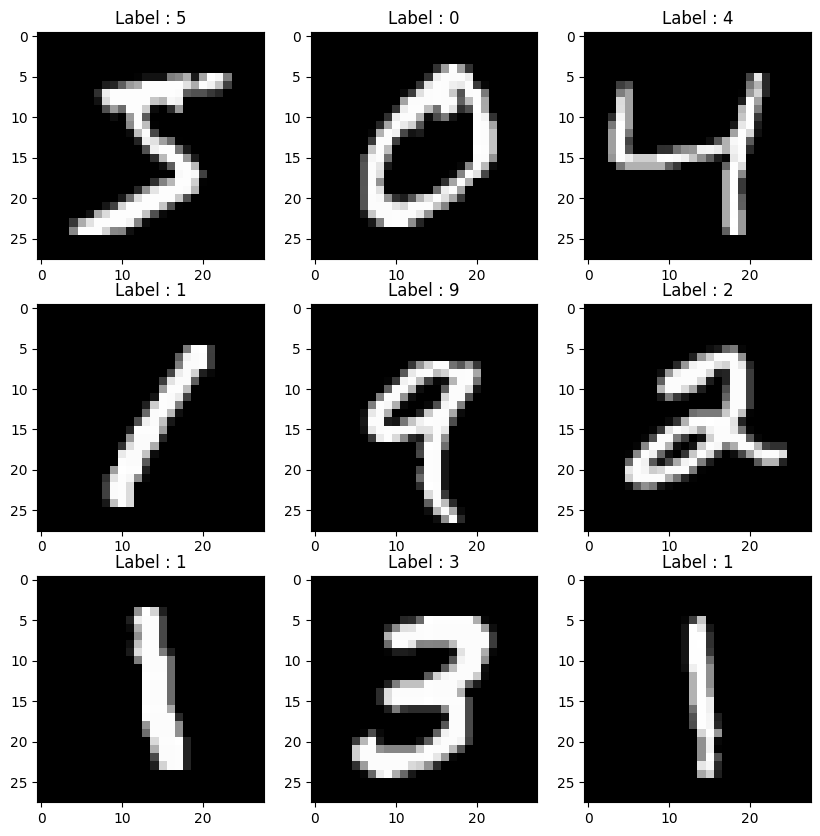

In [10]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f"Label : {ytrain[i]}")

In [11]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
len(np.unique(ytrain))

10

### This is multiclass classification problem

### Preprocess image data

In [13]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [14]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### One Hot encode the Y features

In [15]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat= to_categorical(ytest)

In [16]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [18]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [19]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
xtrain.shape

(60000, 28, 28)

### Build the neural network

In [21]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [22]:
model = Sequential()

# Add Input Layer
model.add(Input(shape=(28,28,1)))

# Add Convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Add Max Pooling 1
model.add(MaxPooling2D(pool_size=(2,2)))

#Add Convolution Layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add MaxPooling 2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add Flatten Layer
model.add(Flatten())

# Add Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
hist = model.fit(xtrain_scl, ytrain_cat, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 18s 5ms/step - loss: 0.2209 - accuracy: 0.9318 - val_loss: 0.0634 - val_accuracy: 0.9830
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0834 - accuracy: 0.9738 - val_loss: 0.0461 - val_accuracy: 0.9872
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0671 - accuracy: 0.9794 - val_loss: 0.0384 - val_accuracy: 0.9893
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0590 - accuracy: 0.9814 - val_loss: 0.0350 - val_accuracy: 0.9900
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0321 - val_accuracy: 0.9910
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0450 - accuracy: 0.9857 - val_loss: 0.0343 - val_accuracy: 0.9898
Epoch 7/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0417 - accuracy: 0.9864 - val_loss: 0.0337 - val_accuracy

### Plot the Learning curve

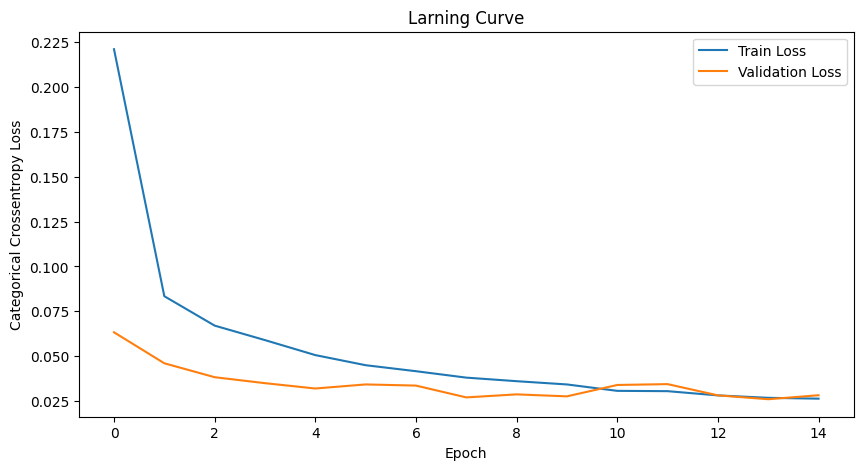

In [26]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Larning Curve')
plt.ylabel('Categorical Crossentropy Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Evaluate the model in train and test

In [27]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0101 - accuracy: 0.9972


[0.010076414793729782, 0.9971666932106018]

In [28]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9925


[0.023641150444746017, 0.9925000071525574]

### Predict the results for train and test

In [29]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [30]:
yprob_train[0:5]

array([[1.4861699e-13, 3.2228367e-12, 1.6364918e-11, 3.5535468e-04,
        2.7568958e-16, 9.9964440e-01, 7.7189164e-14, 1.9854093e-10,
        1.5599471e-07, 1.3081316e-07],
       [9.9999964e-01, 2.6033859e-16, 2.3667749e-07, 2.8457512e-12,
        6.2663069e-12, 2.8599602e-11, 3.0354119e-08, 2.1013441e-13,
        6.2440328e-08, 9.1605958e-09],
       [1.0877318e-15, 5.5396352e-08, 1.0826593e-10, 5.8412657e-11,
        9.9999952e-01, 1.8918140e-12, 9.0593243e-14, 4.2951106e-07,
        7.6338296e-09, 2.9409724e-08],
       [1.2321048e-09, 9.9999011e-01, 2.2341621e-07, 1.8335156e-11,
        3.2435939e-06, 2.0602636e-10, 3.6731361e-08, 4.0907721e-06,
        2.2049528e-06, 1.7012281e-08],
       [3.9628216e-13, 8.5819893e-12, 4.2886503e-09, 1.1270865e-09,
        5.9560200e-05, 1.3175989e-10, 8.2502788e-15, 4.2538034e-07,
        1.7958995e-05, 9.9992204e-01]], dtype=float32)

In [31]:
yprob_test[0:5]

array([[1.60918640e-11, 7.96905944e-12, 8.22930630e-08, 3.20156545e-07,
        2.86801324e-14, 6.19814746e-12, 2.11099417e-20, 9.99999642e-01,
        1.65998354e-10, 4.42377406e-08],
       [1.33976400e-07, 5.41604841e-08, 9.99999404e-01, 1.46082826e-10,
        2.34000822e-11, 4.17508736e-12, 3.25949259e-07, 1.52677502e-12,
        6.65736577e-09, 1.87365054e-12],
       [1.71399650e-09, 9.99987364e-01, 8.16684675e-08, 3.23939453e-09,
        1.10541168e-05, 1.13780054e-07, 4.61218761e-08, 9.73482997e-07,
        3.25401828e-07, 5.19485521e-09],
       [9.99987245e-01, 1.52350260e-14, 4.15592558e-06, 1.63948979e-08,
        2.28758656e-09, 3.89991470e-08, 6.23767664e-06, 2.50500898e-10,
        9.57814791e-07, 1.31321156e-06],
       [6.51986187e-10, 1.30875259e-12, 6.26666774e-11, 1.98609616e-13,
        9.99999404e-01, 4.93335234e-12, 3.90163207e-10, 1.96237922e-11,
        1.49007606e-09, 6.53343420e-07]], dtype=float32)

In [32]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [33]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [34]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [36]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion matrix

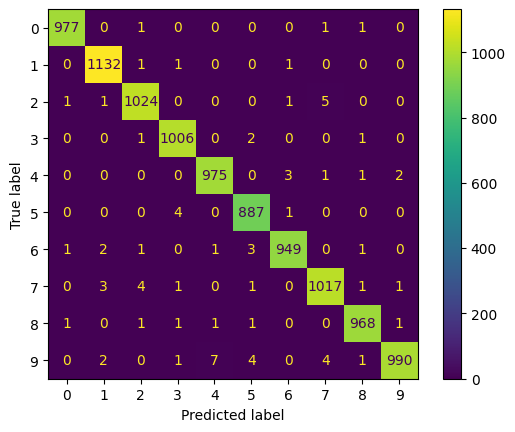

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save above model for future use

In [39]:
model.save('digit_model.keras')

### Load above model

In [40]:
from keras.models import load_model
nn = load_model('/content/digit_model.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [41]:
# Loading the image
import cv2
img = cv2.imread('/content/example_img.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [42]:
img_scl = img.astype('float32')/255

In [43]:
probs = model.predict(np.array([img_scl]))

1/1 [==============================] - 0s 187ms/step


In [44]:
probs

array([[2.6525293e-21, 5.4173121e-18, 4.0968474e-13, 9.9999940e-01,
        8.1820654e-20, 5.8701488e-07, 5.8172452e-20, 1.2136335e-14,
        1.5378145e-11, 6.6911160e-12]], dtype=float32)

In [45]:
pred = np.max(probs)
pred

0.9999994

In [46]:
prob = np.max(probs)
prob

0.9999994

In [49]:
def predict_number(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.show()
  img_scl = img.astype('float32')/255
  probs = model.predict(np.array([img_scl]))
  pred = np.argmax(probs)
  prob = np.max(probs)
  return pred, prob

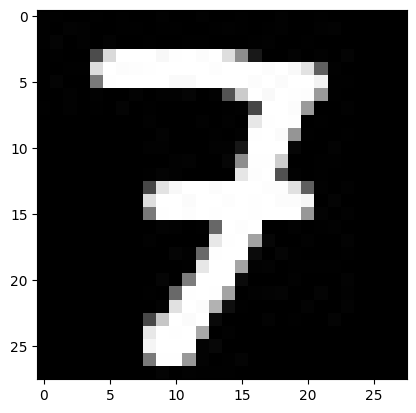

1/1 [==============================] - 0s 17ms/step


(7, 0.9999932)

In [50]:
predict_number('/content/example_img2.jpg')

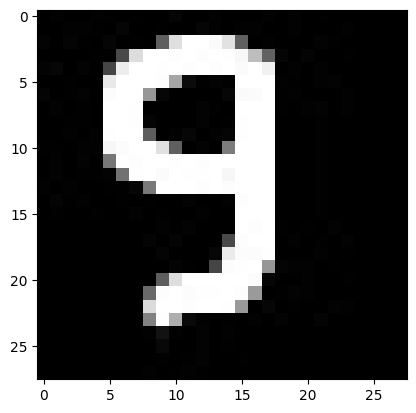

1/1 [==============================] - 0s 27ms/step


(3, 0.746632)

In [51]:
predict_number('/content/example_img3.jpg')